#### create dataset

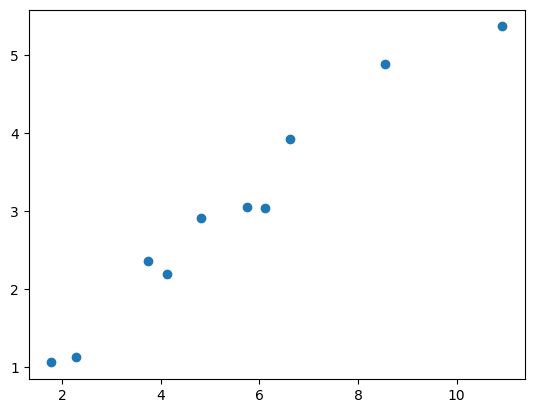

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.78, 6.12, 6.63, 4.13, 8.55, 10.92, 4.81, 3.75, 2.28, 5.74])
y = np.array([1.06, 3.04, 3.93, 2.19, 4.89, 5.37, 2.91, 2.36, 1.13, 3.05])

plt.scatter(x, y)
plt.show()

#### linear regression using scikit_learn

In [4]:
def ols_loss(params, x, y):
    w, b = params

    # IMPLEMENT HERE
    y_hat = w * x + b
    mse = np.mean((y - y_hat)**2)

    return mse

In [5]:
from scipy import optimize

# IMPLEMENT HERE
result = optimize.minimize(ols_loss, [0, 0], args=(x, y))

print(result)
w_opt, b_opt = result.x

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.06684729140805729
        x: [ 5.031e-01  2.403e-01]
      nit: 7
      jac: [-4.284e-08 -6.519e-09]
 hess_inv: [[ 7.138e-02 -3.907e-01]
            [-3.907e-01  2.638e+00]]
     nfev: 24
     njev: 8


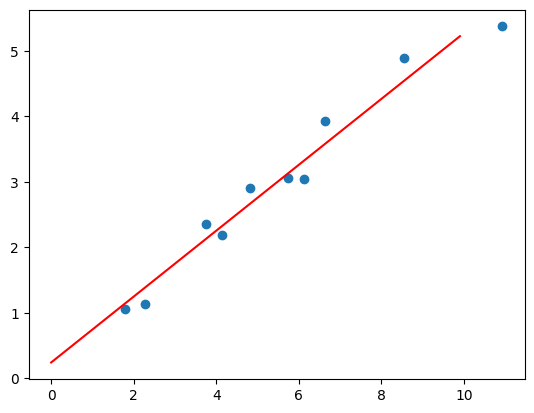

In [6]:
x_test = np.arange(0, 10, 0.1)
y_hat = w_opt * x_test + b_opt

plt.scatter(x, y)
plt.plot(x_test, y_hat, c='red')
plt.show()

#### linear regression using simple code

In [10]:
def ols_loss(params, x, y):
    w, b = params

    # IMPLEMENT HERE
    y_hat = w * x + b
    mse = np.mean((y - y_hat)**2)


    return mse

In [11]:
def compute_graident(params, x, y):
    w, b = params
    n = len(x)

    # IMPLEMENT HERE
    y_hat = w * x + b
    grad_w = (-2/n) * np.sum(x * (y - y_hat))
    grad_b = (-2/n) * np.sum(y - y_hat)

    return np.array([grad_w, grad_b])

def minimize(x, y, learning_rate = 0.01, num_iterations = 1000):
    w, b = 0, 0
    for _ in range(num_iterations):
        #IMPLEMENT HERE
        gradient = compute_graident([w, b], x, y)
        w -= learning_rate * gradient[0]
        b -= learning_rate * gradient[1]
    return w, b

0.5037244251723141 0.23639361345270662


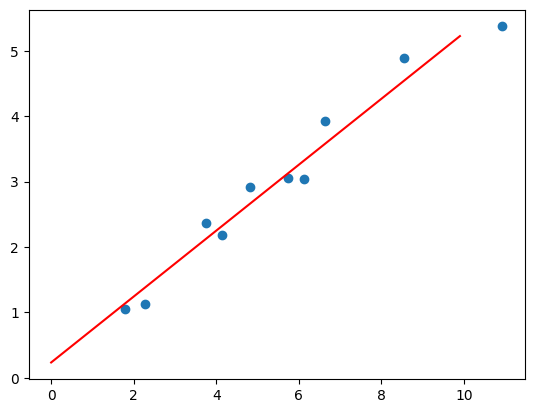

In [12]:
w_opt, b_opt = minimize(x, y)
print(w_opt, b_opt)

x_test = np.arange(0, 10, 0.1)
y_hat = w_opt * x_test + b_opt

plt.scatter(x, y)
plt.plot(x_test, y_hat, c='red')
plt.show()